# Intro

Learning the basisc of the Quantum computers using `Qiskit` mainly from:

<https://qiskit.org/textbook/>

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()

# Basic circut

To create a basic circuit we can use a `QuantumCircuit` function to wich we pass the number of qubits to use and number off output bits

In [2]:
qc = QuantumCircuit(1,1)

than we can drop in a quantum gate `x` wich negates the input and `measure` to write the output of the quantum bit to the ordinary output bit. At the begining all qubits start with `1`

In [3]:
qc.x(0)
qc.measure(0,0)

Than we can draw our created circuit

In [4]:
qc.draw()

┌───┐┌─┐
q_0: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

# Creating a simple *Adder*
We can start by creating a circuit with 4 qubits and 2 out bits

In [5]:
adder = QuantumCircuit(4,2)

# encode inputs in qubits 0 and 1
adder.x(0) # For a=0, remove the this line. For a=1, leave it.
adder.x(1) # For b=0, remove the this line. For b=1, leave it.

We can visualy separate parts of the circuit using

In [6]:
adder.barrier()

To create an standard half adder we need an `XOR` and `AND` gates. On the quantum computer we need quantum gates:

- `CNOT` - Look at $2$ inputs then if inputs are the same overwrites the target with 0 if not with 1, Other way of looking at it does `NOT` on target if the control is $1$

`CNOT` - `@cx()`

| Input ($q_1$, $q_0$) |  Output ($q_1$, $q_0$) |
|----------------------|------------------------|
|          $00$          |   $00$                   |
|          $01$          |   $11$                   |
|          $10$          |   $10$                   |
|          $11$          |   $01$                   |

just by implementig that we get the sum of the numbers, we now need to implement tha *carry* bit

the carry bit is $1$ only when both inputs are $1$ in standard computing we would use for that an `AND` gate in quantum computiong we use its equivalent - `Toffoli` gate (`(@cxx()`)

combining that we can create a circuit:

In [7]:
# 0 and 1 are input qubits

# use cnots to write the XOR of the inputs on qubit 2
adder.cx(0,2)
adder.cx(1,2)

# use ccx to write the AND (Toffoli) of the inputs on qubit 3
adder.ccx(0,1,3)

# Visual separation between inpus and the working circuit
adder.barrier()

# Measure the values on both output qubits
adder.measure(2,0) # get the value from the eqiv to XOR
adder.measure(3,1) # get the value from the eqiv to AND
adder.draw() # Show the circuit

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

We can now simulate behaviour of this circuit using the `aer_simulator`:

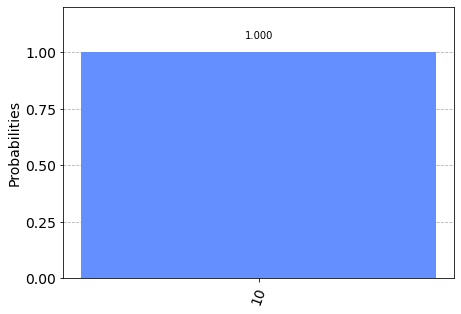

In [8]:
sim = Aer.get_backend('aer_simulator')
qobj = assemble(adder) # Create qskit circuit
counts = sim.run(qobj).result().get_counts() # Simulate and get results
plot_histogram(counts) # Plot results

In [9]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [10]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [0, 1]
qc.initialize(initial_state, 0)
qc.draw()

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [11]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result()

In [12]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


In [13]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░  ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░──░─┤M├
        └─────────────────┘ ░  ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0

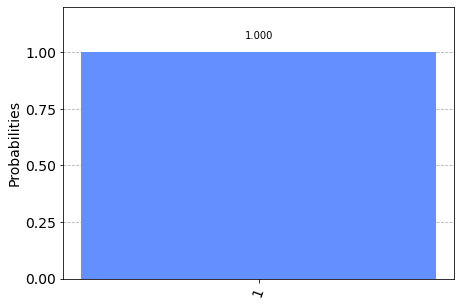

In [14]:
counts = result.get_counts()
plot_histogram(counts)

In [15]:
initial_state = [1/sqrt(3), sqrt(2)/sqrt(3)]  # Define state |q_0>
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.57735027+0.j 0.81649658+0.j]


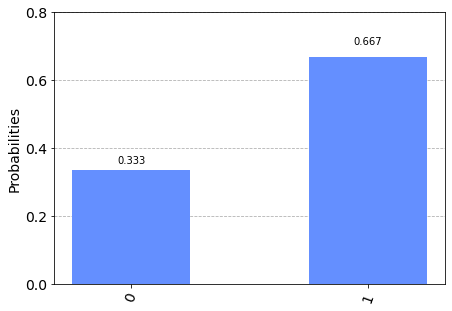

In [16]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

In [17]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector([1,0]) # Bloch


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: numpy.core.multiarray failed to import

In [ ]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()